In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
wic=pd.read_csv(r"C:\Users\shita\Downloads\IPL_all_season_data\all_season_bowling_card.csv")

In [3]:
wic.head(2)

,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,...,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain,href
0,2023.0,1359475,GT v CSK,GT,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,1,...,29,2,7.25,13,2,2,0,1,False,https://www.espncricinfo.com/ci/content/player...
1,2023.0,1359475,GT v CSK,GT,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,1,...,28,0,9.33,6,2,2,0,0,True,https://www.espncricinfo.com/ci/content/player...


In [4]:
wic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12121 entries, 0 to 12120
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         12090 non-null  float64
 1   match_id       12121 non-null  int64  
 2   match_name     12121 non-null  object 
 3   home_team      12121 non-null  object 
 4   away_team      12121 non-null  object 
 5   bowling_team   12121 non-null  object 
 6   venue          12121 non-null  object 
 7   city           12121 non-null  object 
 8   country        12121 non-null  object 
 9   innings_id     12121 non-null  int64  
 10  name           12121 non-null  object 
 11  fullName       12121 non-null  object 
 12  overs          12121 non-null  float64
 13  maidens        12121 non-null  int64  
 14  conceded       12121 non-null  int64  
 15  wickets        12121 non-null  int64  
 16  economyRate    12121 non-null  object 
 17  dots           12121 non-null  int64  
 18  foursC

In [5]:
wic.describe()

,season,match_id,innings_id,overs,maidens,conceded,wickets,dots,foursConceded,sixesConceded,wides,noballs
count,12090.000000,1.212100e+04,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000
mean,2015.524483,8.661406e+05,1.498061,3.220122,0.027638,26.020955,0.904628,7.376867,2.279927,0.970959,0.630889,0.083656
std,4.646466,3.536042e+05,0.500017,1.027020,0.164944,10.785451,0.995607,3.855951,1.669944,1.093401,0.920100,0.319495
min,2008.000000,3.359820e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,5.483080e+05,1.000000,3.000000,0.000000,18.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000
50%,2015.000000,8.298090e+05,1.000000,4.000000,0.000000,26.000000,1.000000,7.000000,2.000000,1.000000,0.000000,0.000000
75%,2020.000000,1.216502e+06,2.000000,4.000000,0.000000,33.000000,1.000000,10.000000,3.000000,2.000000,1.000000,0.000000
max,2023.000000,1.370353e+06,2.000000,4.000000,2.000000,70.000000,6.000000,20.000000,11.000000,8.000000,7.000000,4.000000


# Average Fall of Wickets per Over
Line charts showing the average fall of wickets in each over for different teams.

In [6]:
df3 = wic.groupby(['bowling_team', 'overs'])['wickets'].mean().reset_index().rename(columns={'is_wicket': 'average_wickets_per_over'})


In [7]:
df3

,bowling_team,overs,wickets
0,CSK,0.1,0.500000
1,CSK,0.2,1.000000
2,CSK,0.3,2.000000
3,CSK,0.5,0.000000
4,CSK,1.0,0.090909
...,...,...,...
241,SRH,3.2,1.200000
242,SRH,3.3,0.875000
243,SRH,3.4,0.866667
244,SRH,3.5,1.000000


In [8]:
df=wic.groupby("bowling_team")[["overs","wickets"]].sum()
df['average']= df["wickets"]/df["overs"]

In [9]:
average_wickets_per_over = df.groupby(['bowling_team', 'overs'])['wickets'].mean().reset_index()

In [10]:
average_wickets_per_over

,bowling_team,overs,wickets
0,CSK,4298.7,1284.0
1,DC,4519.5,1252.0
2,GL,571.0,131.0
3,GT,636.1,208.0
4,KKR,4500.6,1226.0
5,KXIP,3594.5,979.0
6,Kochi,257.9,62.0
7,LSG,572.1,181.0
8,MI,4757.2,1375.0
9,PBKS,795.0,222.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


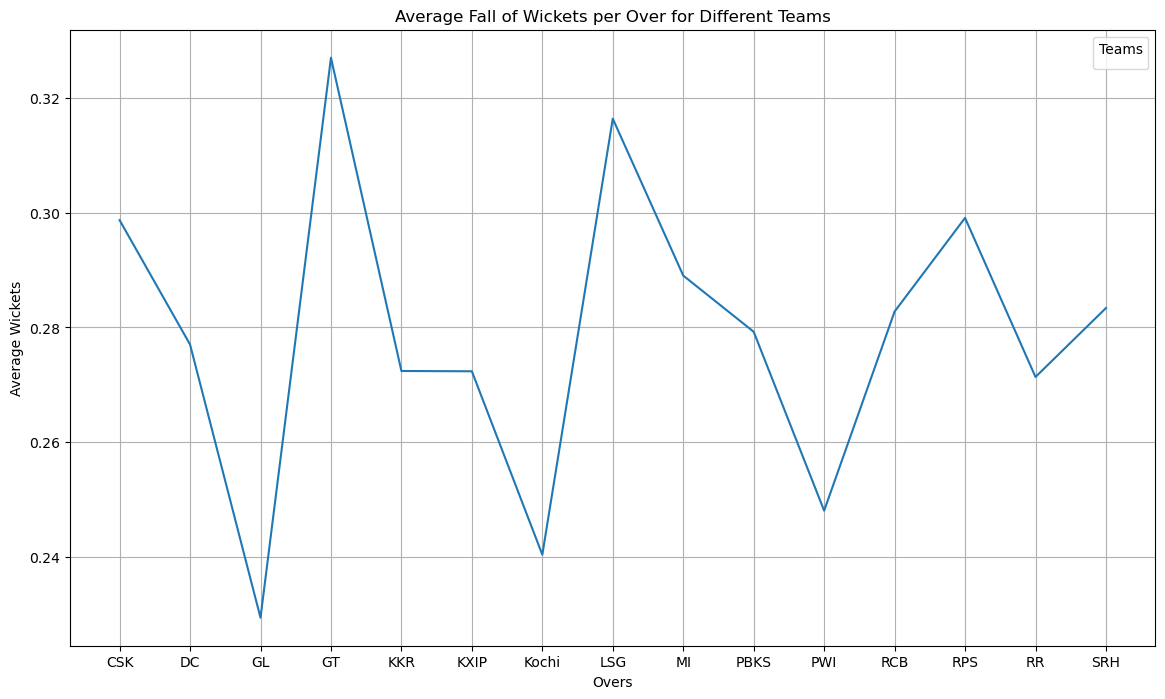

In [11]:
# Plotting using Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x= "bowling_team", y="average")
plt.xlabel('Overs')
plt.ylabel('Average Wickets')
plt.title('Average Fall of Wickets per Over for Different Teams')
plt.legend(title='Teams')
plt.grid(True)
plt.show()

Gujarat Lions (GL) tend to lose fewer wickets per over on average, indicating a more stable batting performance. On the other hand, Gujarat Titans (GT) tend to lose more wickets per over, suggesting a less stable batting performance compared to GL.

# Wickets Lost in Powerplay
Bar charts comparing the number of wickets lost by teams during the powerplay overs (1-6).

In [12]:
bat=pd.read_csv(r"C:\Users\shita\Downloads\IPL_all_season_data\all_season_batting_card.csv")

In [13]:
bat.head()

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
0,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0.0,0.0,16.66,False,False,"{'wickets': 1, 'runs': 14}",2.2,b Mohammed Shami,<strong>Shami breaches the defences of Conway<...,NaN
1,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,4.0,9.0,184.00,False,False,"{'wickets': 5, 'runs': 151}",17.1,c Shubman Gill b Joseph,"Joseph misses the yorker, but is still a hard-...",NaN
2,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,4.0,1.0,135.29,False,False,"{'wickets': 2, 'runs': 50}",5.5,c &dagger;Saha b Rashid Khan,"<strong>Rashid strikes back, Moeen has nicked ...",NaN
3,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,1.0,0.0,116.66,False,False,"{'wickets': 3, 'runs': 70}",7.4,c &dagger;Saha b Rashid Khan,<strong>Rashid takes out both Moeen and Stokes...,NaN
4,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0.0,1.0,100.00,False,False,"{'wickets': 4, 'runs': 121}",12.5,b Little,Maiden IPL wicket for Josh Little. Rayudu dash...,NaN


In [14]:
bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15720 entries, 0 to 15719
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           15684 non-null  float64
 1   match_id         15720 non-null  int64  
 2   match_name       15720 non-null  object 
 3   home_team        15720 non-null  object 
 4   away_team        15720 non-null  object 
 5   venue            15720 non-null  object 
 6   city             15720 non-null  object 
 7   country          15720 non-null  object 
 8   current_innings  15720 non-null  object 
 9   innings_id       15720 non-null  int64  
 10  name             15720 non-null  object 
 11  fullName         15720 non-null  object 
 12  runs             15714 non-null  float64
 13  ballsFaced       15714 non-null  float64
 14  minutes          15714 non-null  object 
 15  fours            15714 non-null  float64
 16  sixes            15714 non-null  float64
 17  strikeRate  

In [15]:
bat.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'current_innings', 'innings_id', 'name', 'fullName',
       'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate',
       'captain', 'isNotOut', 'runningScore', 'runningOver', 'shortText',
       'commentary', 'link'],
      dtype='object')

In [16]:
bat.isnull().sum()

season                36
match_id               0
match_name             0
home_team              0
away_team              0
venue                  0
city                   0
country                0
current_innings        0
innings_id             0
name                   0
fullName               0
runs                   6
ballsFaced             6
minutes                6
fours                  6
sixes                  6
strikeRate             6
captain                0
isNotOut               6
runningScore           6
runningOver         3691
shortText              0
commentary          3694
link               15720
dtype: int64

In [17]:
pp_data = bat[(bat['runningOver'] >= 1) & (bat['runningOver'] <= 6)]

In [18]:
pp_data=pp_data[pp_data['isNotOut']== False]
pp_data.head(3)

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
0,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0.0,0.0,16.66,False,False,"{'wickets': 1, 'runs': 14}",2.2,b Mohammed Shami,<strong>Shami breaches the defences of Conway<...,NaN
2,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,4.0,1.0,135.29,False,False,"{'wickets': 2, 'runs': 50}",5.5,c &dagger;Saha b Rashid Khan,"<strong>Rashid strikes back, Moeen has nicked ...",NaN
9,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,GT,2,...,2.0,2.0,156.25,False,False,"{'wickets': 1, 'runs': 37}",3.5,c Dube b Hangargekar,wicket number no. 1 for Hangargekar. In his fi...,NaN
16,2023.0,1359476,PBKS v KKR,PBKS,KKR,"Punjab Cricket Association IS Bindra Stadium, ...",Chandigarh,India,PBKS,1,...,2.0,2.0,191.66,False,False,"{'wickets': 1, 'runs': 23}",1.6,c &dagger;Rahmanullah Gurbaz b Southee,<B>Southee has the last laugh</b> as this good...,NaN
23,2023.0,1359476,PBKS v KKR,PBKS,KKR,"Punjab Cricket Association IS Bindra Stadium, ...",Chandigarh,India,KKR,2,...,0.0,0.0,50.00,False,False,"{'wickets': 1, 'runs': 13}",1.1,c Curran b Arshdeep Singh,<strong>Arshdeep strikes first ball!</strong> ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15693,2008.0,336039,CSK v KXIP,CSK,KXIP,"Wankhede Stadium, Mumbai",Mumbai,India,KXIP,1,...,0.0,0.0,75.00,False,False,"{'wickets': 2, 'runs': 11}",2.2,c &dagger;Patel b Gony,that's another big one! Sangakkara has walked ...,NaN
15694,2008.0,336039,CSK v KXIP,CSK,KXIP,"Wankhede Stadium, Mumbai",Mumbai,India,KXIP,1,...,0.0,0.0,50.00,True,False,"{'wickets': 3, 'runs': 28}",4.4,c Muralitharan b Gony,"Yuvraj is gone now, what a catch from Murali, ...",NaN
15702,2008.0,336039,CSK v KXIP,CSK,KXIP,"Wankhede Stadium, Mumbai",Mumbai,India,CSK,2,...,1.0,0.0,85.71,False,False,"{'wickets': 1, 'runs': 14}",2.2,c Mota b Pathan,"strike one! Pathan has drawn first blood, shor...",NaN
15705,2008.0,336040,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",Mumbai,India,CSK,1,...,1.0,1.0,114.28,False,False,"{'wickets': 1, 'runs': 39}",5.2,c Jadeja b Pathan,the change has worked! Vidyut charges Yusuf an...,NaN


In [19]:
wickets_by_team = pp_data.groupby('current_innings').size().reset_index(name='wickets')
wickets_by_team

,current_innings,wickets
0,CSK,231
1,DC,325
2,GL,37
3,GT,35
4,KKR,313
5,KXIP,249
6,Kochi,21
7,LSG,40
8,MI,291
9,PBKS,55


In [20]:
# Filter data for powerplay overs (1-6)
powerplay_data = bat[(bat['runningOver'] >= 1) & (bat['runningOver'] <= 6)]

# Identify wicket events (isNotOut is False)
powerplay_wickets = powerplay_data[powerplay_data['isNotOut'] == False]

# Count wickets by team
wickets_by_team1 = powerplay_wickets.groupby('current_innings').size().reset_index(name='wickets')
wickets_by_team1

,current_innings,wickets
0,CSK,231
1,DC,325
2,GL,37
3,GT,35
4,KKR,313
5,KXIP,249
6,Kochi,21
7,LSG,40
8,MI,291
9,PBKS,55


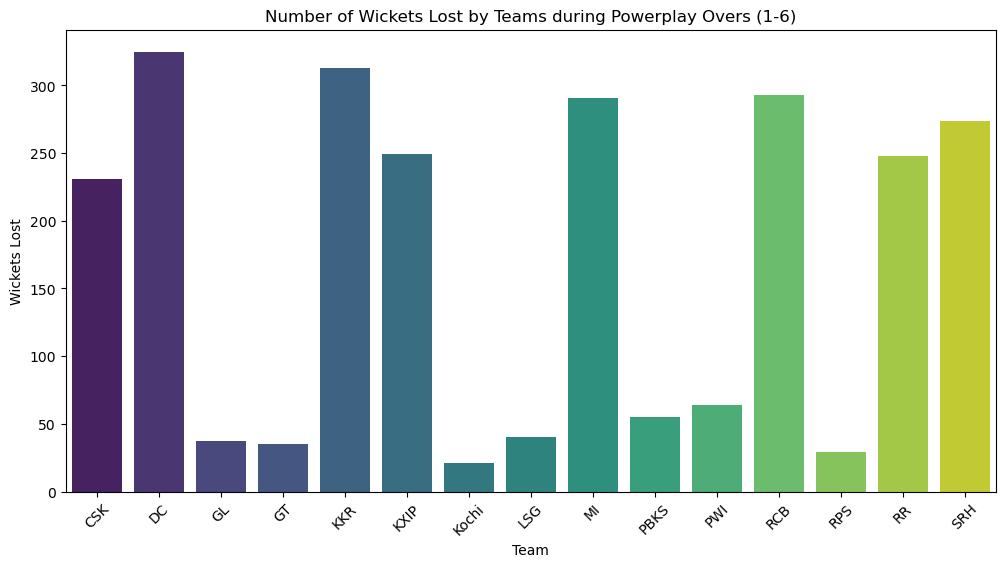

In [21]:
# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='current_innings', y='wickets', data=wickets_by_team, palette='viridis')
plt.title('Number of Wickets Lost by Teams during Powerplay Overs (1-6)')
plt.xlabel('Team')
plt.ylabel('Wickets Lost')
plt.xticks(rotation=45)
plt.show()

Some teams like DC and RCB have lost a lot of wickets in the Powerplay Overs, indicating a weakness in their early batting. Others, like GL, GT, and Kochi, have lost fewer wickets, suggesting a more cautious approach. This data can help teams analyze their strategies and improve their performance in the early overs.

# Wickets Lost in Middle Overs
Bar charts displaying the number of wickets lost in the middle overs (7-15) by different teams.

In [22]:
# Filter data for middle overs (7-15)
pp_data2 = bat[(bat['runningOver'] >= 7) & (bat['runningOver'] <= 15)]

# Identify wicket events (isNotOut is False)
middle_overs_wickets = pp_data2[pp_data2['isNotOut'] == False]

# Count wickets by team
wickets_by_team1 = middle_overs_wickets.groupby('current_innings').size().reset_index(name='wickets')

In [23]:
wickets_by_team1

,current_innings,wickets
0,CSK,427
1,DC,496
2,GL,72
3,GT,56
4,KKR,487
5,KXIP,402
6,Kochi,25
7,LSG,69
8,MI,518
9,PBKS,99


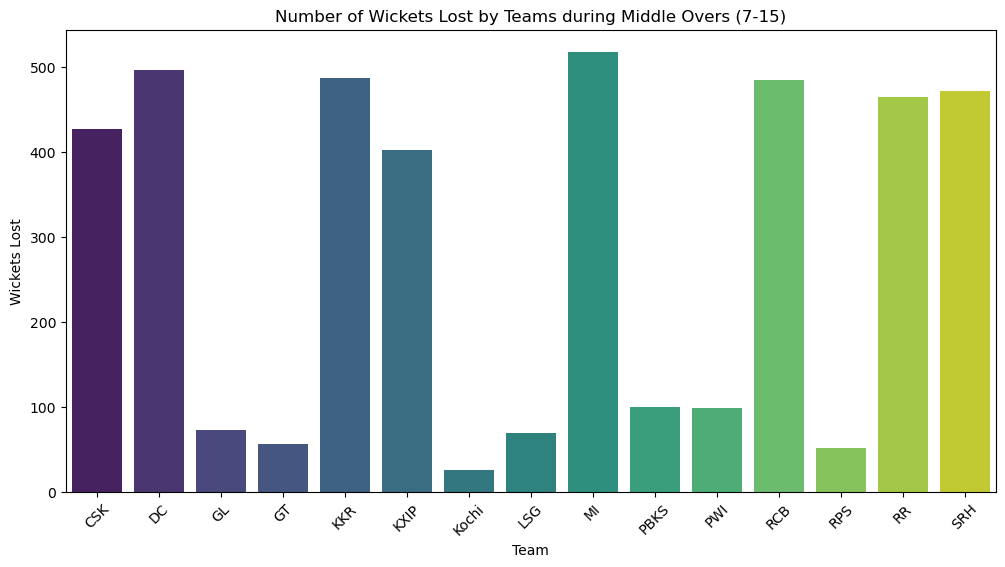

In [24]:
# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='current_innings', y='wickets', data=wickets_by_team1, palette='viridis')
plt.title('Number of Wickets Lost by Teams during Middle Overs (7-15)')
plt.xlabel('Team')
plt.ylabel('Wickets Lost')
plt.xticks(rotation=45)
plt.show()

Teams like MI and DC struggle with losing wickets during the middle overs, while others like GL, GT, Kochi, LSG, PBKS, PWI, and RPS have been more stable. This data highlights the importance of building partnerships and stability in the middle overs for a successful innings.

# - **Wickets Lost in Death Overs**
   - Bar charts showing the number of wickets lost in the death overs (16-20) by different teams.

In [25]:
pp_data3 = bat[(bat['runningOver'] >= 16) & (bat['runningOver'] <= 20)]
middle_overs_wickets = pp_data3[pp_data3['isNotOut'] == False]

wickets_by_team2 = middle_overs_wickets.groupby('current_innings').size().reset_index(name='wickets')
wickets_by_team2

,current_innings,wickets
0,CSK,358
1,DC,398
2,GL,61
3,GT,53
4,KKR,421
5,KXIP,367
6,Kochi,29
7,LSG,57
8,MI,479
9,PBKS,86


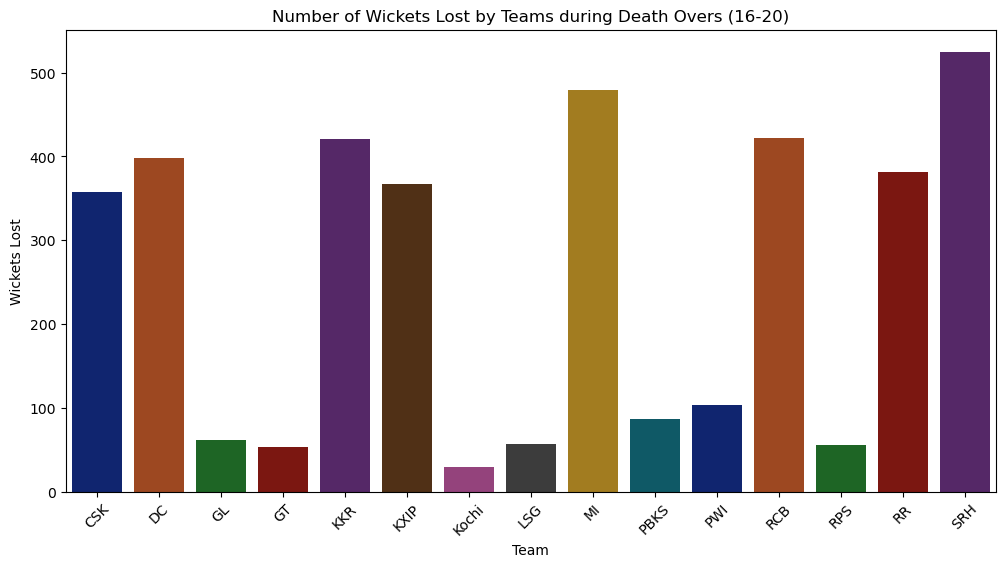

In [26]:
# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='current_innings', y='wickets', data=wickets_by_team2, palette='dark')
plt.title('Number of Wickets Lost by Teams during Death Overs (16-20)')
plt.xlabel('Team')
plt.ylabel('Wickets Lost')
plt.xticks(rotation=45)
plt.show()

SRH (Sunrisers Hyderabad) has lost the highest number of wickets during the death overs (16-20), indicating potential challenges in finishing their innings strongly. Teams like MI (Mumbai Indians), DC (Delhi Capitals), and RCB (Royal Challengers Bangalore) have also lost a significant number of wickets in the death overs, suggesting the need for better execution of their batting strategies towards the end of the innings. Other teams have generally fared better in terms of wickets lost during the death overs, indicating a more stable batting performance towards the end of their inning

# Cumulative Wickets per Match
Line charts illustrating the cumulative wickets lost over the course of matches

In [27]:

bat.head()



,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
0,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0.0,0.0,16.66,False,False,"{'wickets': 1, 'runs': 14}",2.2,b Mohammed Shami,<strong>Shami breaches the defences of Conway<...,NaN
1,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,4.0,9.0,184.00,False,False,"{'wickets': 5, 'runs': 151}",17.1,c Shubman Gill b Joseph,"Joseph misses the yorker, but is still a hard-...",NaN
2,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,4.0,1.0,135.29,False,False,"{'wickets': 2, 'runs': 50}",5.5,c &dagger;Saha b Rashid Khan,"<strong>Rashid strikes back, Moeen has nicked ...",NaN
3,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,1.0,0.0,116.66,False,False,"{'wickets': 3, 'runs': 70}",7.4,c &dagger;Saha b Rashid Khan,<strong>Rashid takes out both Moeen and Stokes...,NaN
4,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0.0,1.0,100.00,False,False,"{'wickets': 4, 'runs': 121}",12.5,b Little,Maiden IPL wicket for Josh Little. Rayudu dash...,NaN


In [28]:
bat['isNotOut'].value_counts()

isNotOut
False    12040
True      3674
Name: count, dtype: int64

In [29]:
df=bat.loc[bat['isNotOut']==False]

In [30]:
df.head(2)

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
0,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0.0,0.0,16.66,False,False,"{'wickets': 1, 'runs': 14}",2.2,b Mohammed Shami,<strong>Shami breaches the defences of Conway<...,NaN
1,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,4.0,9.0,184.00,False,False,"{'wickets': 5, 'runs': 151}",17.1,c Shubman Gill b Joseph,"Joseph misses the yorker, but is still a hard-...",NaN
2,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,4.0,1.0,135.29,False,False,"{'wickets': 2, 'runs': 50}",5.5,c &dagger;Saha b Rashid Khan,"<strong>Rashid strikes back, Moeen has nicked ...",NaN
3,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,1.0,0.0,116.66,False,False,"{'wickets': 3, 'runs': 70}",7.4,c &dagger;Saha b Rashid Khan,<strong>Rashid takes out both Moeen and Stokes...,NaN
4,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0.0,1.0,100.00,False,False,"{'wickets': 4, 'runs': 121}",12.5,b Little,Maiden IPL wicket for Josh Little. Rayudu dash...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15713,2008.0,336040,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",Mumbai,India,RR,2,...,1.0,0.0,85.71,False,False,"{'wickets': 3, 'runs': 42}",6.4,run out (Ntini),that's another! this is a wonderful piece of i...,NaN
15714,2008.0,336040,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",Mumbai,India,RR,2,...,3.0,0.0,147.36,False,False,"{'wickets': 4, 'runs': 107}",14.1,b Muralitharan,bowled him! Watson comes down the track to Mur...,NaN
15715,2008.0,336040,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",Mumbai,India,RR,2,...,3.0,4.0,143.58,False,False,"{'wickets': 7, 'runs': 143}",17.4,run out (Raina),Raina you beauty! A direct hit runs out Yusuf!...,NaN
15716,2008.0,336040,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",Mumbai,India,RR,2,...,0.0,1.0,133.33,False,False,"{'wickets': 5, 'runs': 139}",16.6,c Dhoni b Muralitharan,caught! Another twist! Kaif steps out of his c...,NaN


In [31]:
data=df.groupby(["match_id"])["isNotOut"].count().reset_index(name='cum_wickets')

In [32]:
data

,match_id,cum_wickets
0,335982,13
1,335983,9
2,335984,9
3,335985,12
4,335986,15
...,...,...
1019,1359544,9
1020,1370350,17
1021,1370351,18
1022,1370352,13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


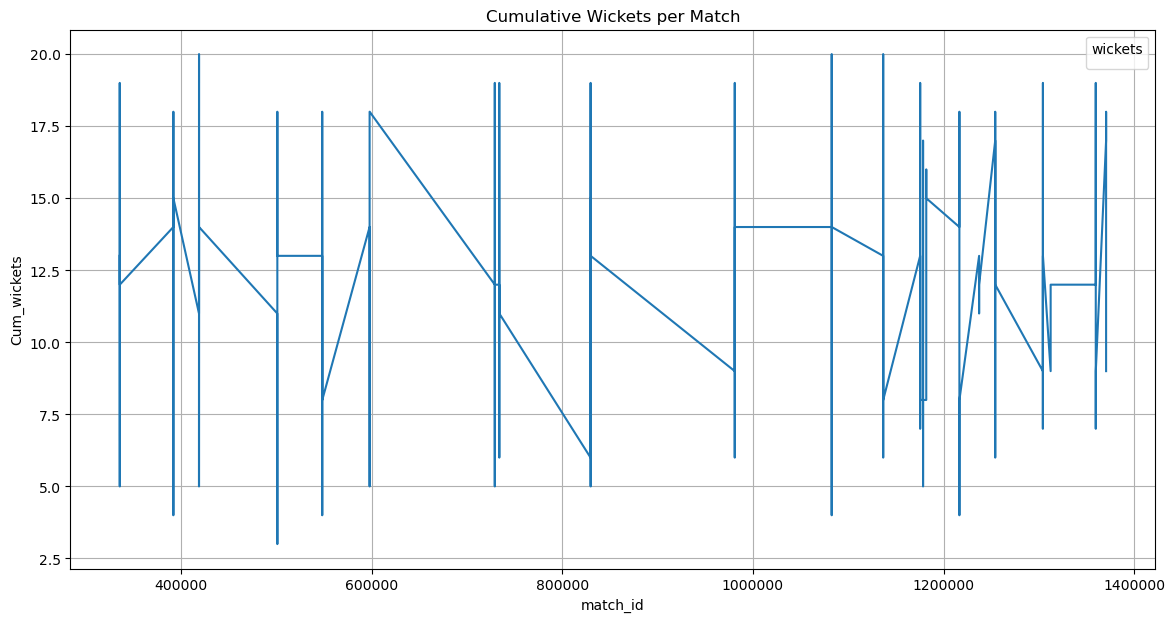

In [33]:
# Plotting using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x= "match_id", y="cum_wickets")
plt.xlabel('match_id')
plt.ylabel('Cum_wickets')
plt.title('Cumulative Wickets per Match')
plt.legend(title='wickets')
plt.ticklabel_format(style='plain')
plt.grid(True)
plt.show()

# Home vs. Away Wicket Falls
Dual-axis bar charts comparing the number of wickets lost in home matches versus away matche

In [34]:
data1=df.groupby(["home_team"])["isNotOut"].count().reset_index(name='no_of_wickets')

In [35]:
data2=df.groupby(["away_team"])["isNotOut"].count().reset_index(name='no_of_wickets')

In [36]:
data1

,home_team,no_of_wickets
0,CSK,1443
1,DC,1418
2,GL,169
3,GT,216
4,KKR,1349
5,KXIP,1043
6,Kochi,85
7,LSG,211
8,MI,1445
9,PBKS,235


In [37]:
data2

,away_team,no_of_wickets
0,CSK,1124
1,DC,1403
2,GL,168
3,GT,179
4,KKR,1413
5,KXIP,1178
6,Kochi,75
7,LSG,174
8,MI,1529
9,PBKS,278


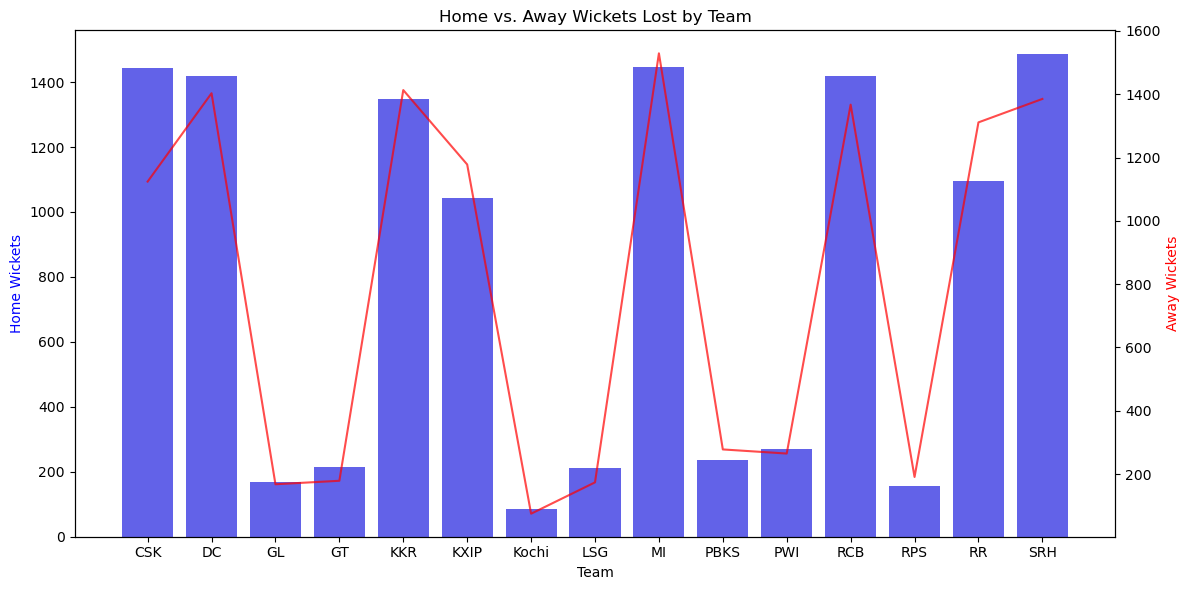

In [38]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='home_team', y='no_of_wickets', data=data1, color='blue', alpha=0.7, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x='away_team', y='no_of_wickets', data=data2, color='red', alpha=0.7, ax=ax2)
ax1.set_xlabel('Team')
ax1.set_ylabel('Home Wickets', color='blue')
ax2.set_ylabel('Away Wickets', color='red')
plt.title('Home vs. Away Wickets Lost by Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
bat.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'current_innings', 'innings_id', 'name', 'fullName',
       'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate',
       'captain', 'isNotOut', 'runningScore', 'runningOver', 'shortText',
       'commentary', 'link'],
      dtype='object')

# Fall of Wickets by Runs Scored
Box plots showing the distribution of runs scored before the fall of each wicket.

In [40]:
# df['runningScore'].info()

In [41]:
ipl_data=pd.read_csv(r"C:\Users\shita\Downloads\IPL_all_season_data\all_season_summary.csv")

# Fall of Wickets Across Seasons
Line charts showing the trend of wicket falls across different seasons

In [42]:
wic.head(4)

,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,...,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain,href
0,2023.0,1359475,GT v CSK,GT,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,1,...,29,2,7.25,13,2,2,0,1,False,https://www.espncricinfo.com/ci/content/player...
1,2023.0,1359475,GT v CSK,GT,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,1,...,28,0,9.33,6,2,2,0,0,True,https://www.espncricinfo.com/ci/content/player...
2,2023.0,1359475,GT v CSK,GT,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,1,...,41,1,10.25,10,4,3,0,0,False,https://www.espncricinfo.com/ci/content/player...
3,2023.0,1359475,GT v CSK,GT,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,1,...,26,2,6.5,10,2,1,0,0,False,https://www.espncricinfo.com/ci/content/player...


In [43]:
wic.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team',
       'bowling_team', 'venue', 'city', 'country', 'innings_id', 'name',
       'fullName', 'overs', 'maidens', 'conceded', 'wickets', 'economyRate',
       'dots', 'foursConceded', 'sixesConceded', 'wides', 'noballs', 'captain',
       'href'],
      dtype='object')

In [44]:
season_wickets = wic.groupby('season')['wickets'].sum().reset_index()


In [45]:
season_wickets

,season,wickets
0,2008.0,604
1,2009.0,621
2,2010.0,627
3,2011.0,739
4,2012.0,772
5,2013.0,829
6,2014.0,606
7,2015.0,624
8,2016.0,591
9,2017.0,650


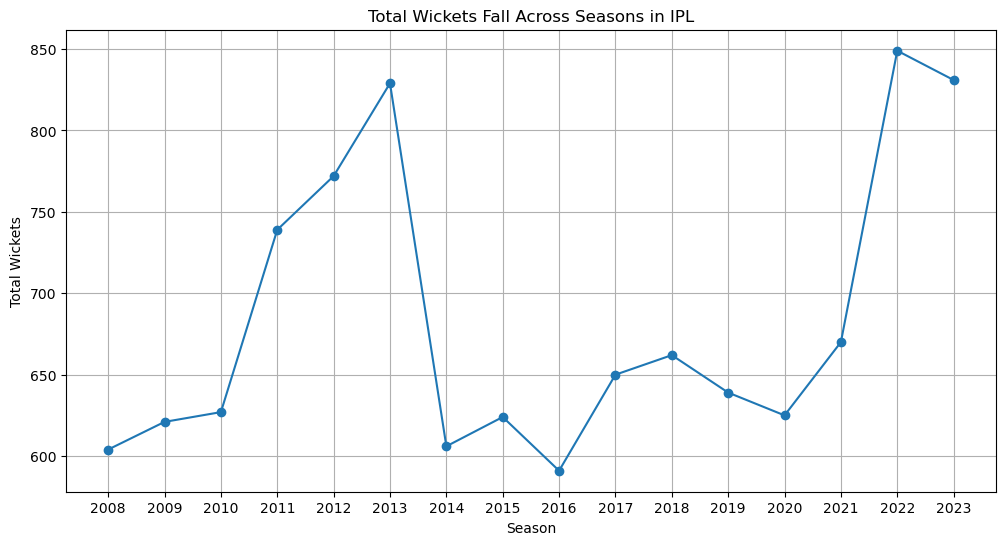

In [46]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(season_wickets['season'], season_wickets['wickets'], marker='o')
plt.xlabel('Season')
plt.ylabel('Total Wickets')
plt.title('Total Wickets Fall Across Seasons in IPL')
plt.grid(True)
plt.xticks(season_wickets['season'])
plt.show()

# Wicket Patterns:
Study the timing and sequence of wickets falling within an inning to identify vulnerable phases.

In [47]:
result = bat.loc[(bat['match_id'] == 335982) & (df['isNotOut'] == False) & (df['innings_id']== 2)]

In [48]:
result.head(2)

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
14830,2008.0,335982,RCB v KKR,RCB,KKR,"M.Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,2,...,0.0,0.0,66.66,True,False,"{'wickets': 1, 'runs': 4}",1.1,b Sharma,"and what a start for him! Full on the mark, Dr...",NaN
14831,2008.0,335982,RCB v KKR,RCB,KKR,"M.Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,2,...,0.0,0.0,37.50,False,False,"{'wickets': 4, 'runs': 24}",5.2,c Ponting b Dinda,"edged and taken! Dinda strikes again, getting ...",NaN


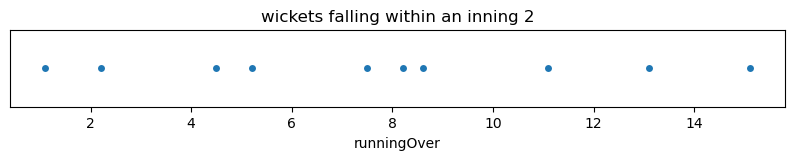

In [49]:
plt.figure(figsize=(10, 1))  # Adjust the figure size to make it more readable
sns.stripplot(data=result['runningOver'], jitter=False, orient='h', size=5)

# Customizing the plot
plt.yticks([])  # Hide y-axis
plt.xlabel('runningOver')
plt.title('wickets falling within an inning 2')

# Display the plot
plt.show()

The analysis identified overs 6 to 10 as the most vulnerable period for teams, with a higher frequency of wickets falling compared to other phases.

# Impact of Early Wickets on Team Total
Scatter plots correlating early wicket losses (within the first 5 overs) with total team scores.


In [50]:
wic.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team',
       'bowling_team', 'venue', 'city', 'country', 'innings_id', 'name',
       'fullName', 'overs', 'maidens', 'conceded', 'wickets', 'economyRate',
       'dots', 'foursConceded', 'sixesConceded', 'wides', 'noballs', 'captain',
       'href'],
      dtype='object')

In [51]:
bat.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'current_innings', 'innings_id', 'name', 'fullName',
       'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate',
       'captain', 'isNotOut', 'runningScore', 'runningOver', 'shortText',
       'commentary', 'link'],
      dtype='object')

#### insufficiate data , team  score till the fall of wicket is not mentioned 

# Frequency of Wickets per Over
Heatmaps showing the frequency of wickets falling in each over for different teams.

In [52]:
points= pd.read_csv(r"C:\Users\shita\Downloads\IPL_all_season_data\points_table.csv")

In [53]:
all_season_details=pd.read_csv(r"C:\Users\shita\Downloads\IPL_all_season_data\all_season_details.csv")

C:\Users\shita\AppData\Local\Temp\ipykernel_21836\2881118080.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  all_season_details=pd.read_csv(r"C:\Users\shita\Downloads\IPL_all_season_data\all_season_details.csv")


In [54]:
all_season_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242550 entries, 0 to 242549
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         242550 non-null  int64  
 1   season             242067 non-null  float64
 2   match_id           242550 non-null  int64  
 3   match_name         242550 non-null  object 
 4   home_team          242550 non-null  object 
 5   away_team          242550 non-null  object 
 6   current_innings    242550 non-null  object 
 7   innings_id         242550 non-null  int64  
 8   over               242550 non-null  int64  
 9   ball               242550 non-null  int64  
 10  runs               242550 non-null  int64  
 11  shortText          242550 non-null  object 
 12  isBoundary         242550 non-null  bool   
 13  isWide             242550 non-null  bool   
 14  isNoball           242550 non-null  bool   
 15  batsman1_id        242550 non-null  int64  
 16  ba

In [55]:
all_season_details.head(3)

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,110,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"nice and full, angling and perhaps swinging in...",<p><strong>7.30pm</strong> Gaikwad and Conway ...,NaN
1,120,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Conway shuffles across off, and shimmies out a...",NaN,NaN
2,130,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length, angling in at off and then straig...",NaN,NaN


In [56]:
data=all_season_details.rename(columns={'current_innings': 'short_name'})

In [57]:
points.columns

Index(['season', 'rank', 'name', 'short_name', 'matchesplayed', 'matcheswon',
       'matcheslost', 'noresult', 'matchpoints', 'nrr', 'for', 'against'],
      dtype='object')

In [58]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         136 non-null    int64  
 1   rank           136 non-null    int64  
 2   name           136 non-null    object 
 3   short_name     136 non-null    object 
 4   matchesplayed  136 non-null    int64  
 5   matcheswon     136 non-null    int64  
 6   matcheslost    136 non-null    int64  
 7   noresult       136 non-null    int64  
 8   matchpoints    136 non-null    int64  
 9   nrr            136 non-null    float64
 10  for            136 non-null    object 
 11  against        136 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 12.9+ KB


In [59]:
output = points.groupby('short_name')['matchesplayed'].sum().reset_index(name='sumof_matchedplayed').set_index('short_name')

In [60]:
output

,sumof_matchedplayed
short_name,
CSK,200
DC,228
GL,28
GT,28
KKR,228
KXIP,228
Kochi,14
LSG,28
MI,228


In [61]:
pivot_table = pd.pivot_table(data,values='wicket_id',index='short_name',columns='over',aggfunc='count').fillna(0)

In [62]:
pivot_table

over,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
short_name,,,,,,,,,,,,,,,,,,,,
CSK,47,32,49,50,46,54,43,41,48,55,55,40,59,54,75,60,63,87,86,109
DC,77,74,89,79,97,81,68,62,69,71,82,91,77,104,102,106,123,142,147,153
GL,7,10,3,9,6,9,8,6,10,7,8,13,11,10,7,3,14,13,16,18
GT,7,6,11,6,8,4,8,7,2,5,7,9,9,10,7,9,6,14,9,18
KKR,55,65,68,50,65,65,48,48,57,49,63,63,59,66,81,87,83,103,92,119
KXIP,31,42,48,46,57,56,38,49,57,40,54,43,48,54,57,64,63,93,95,103
Kochi,2,6,4,4,4,3,2,3,3,4,3,3,1,5,3,7,6,6,9,4
LSG,7,2,8,12,8,7,6,5,4,6,7,10,9,11,16,12,7,7,17,20
MI,42,58,52,70,50,63,41,56,66,58,71,63,66,69,72,94,96,109,115,142


In [63]:
pivot_table.drop(index= 'PBKS',inplace=True)

In [64]:

table=pivot_table.div(output['sumof_matchedplayed'],axis=0)

##### droping the PBKS row as data isnot found in the points table

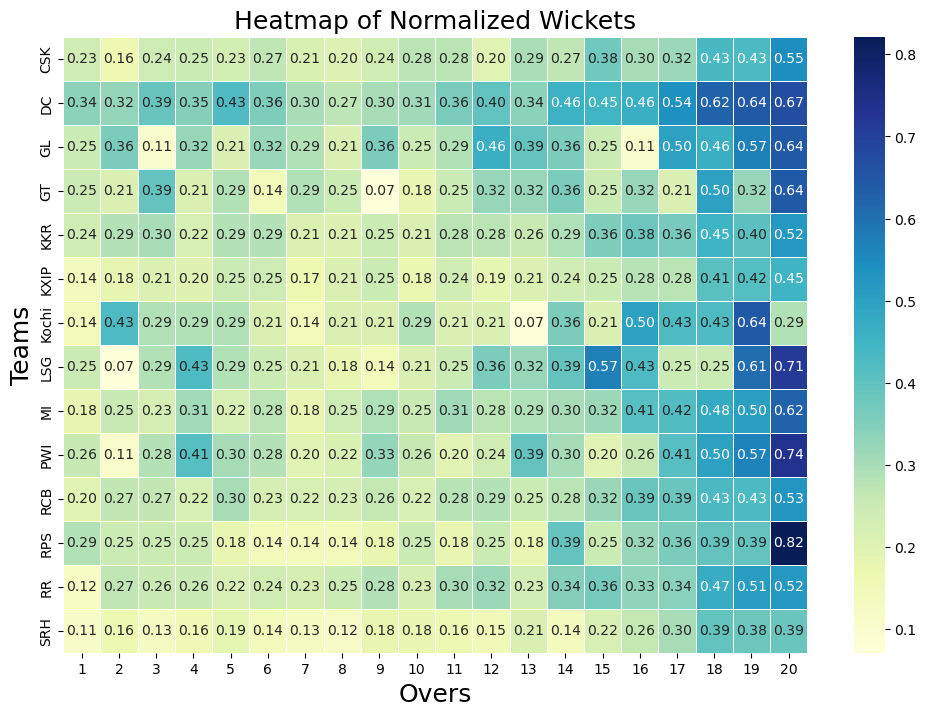

In [65]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(table, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title("Heatmap of Normalized Wickets",fontsize=18)
plt.xlabel("Overs",fontsize=18)
plt.ylabel("Teams",fontsize=18)
plt.show()

# Comparison of Wickets Lost in Wins vs. Losses
Split bar charts comparing the average number of wickets lost in matches won versus matches lost.

In [66]:
ipl_data=pd.read_csv(r"C:\Users\shita\Downloads\IPL_all_season_data\all_season_summary.csv")

In [67]:
ipl_data.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359475,Gujarat Titans v Chennai Super Kings,GT v CSK,"1st Match (N), Indian Premier League at Ahmeda...",GT,CSK,GT,BOWL FIRST,178/7,...,"Wriddhiman Saha (WK),Shubman Gill (UKN),Sai Su...","Devon Conway (UKN),Ruturaj Gaikwad (UKN),Moeen...","Ruturaj Gaikwad,Moeen Ali","Rajvardhan Hangargekar,Ravindra Jadeja",31 March 2023 - night match (20-over match),Saiyed Khalid,Nitin Menon,Virender Sharma,Javagal Srinath,Abhijit Bengeri
1,2023.0,1359476,Punjab Kings v Kolkata Knight Riders,PBKS v KKR,"2nd Match (D/N), Indian Premier League at Chan...",PBKS,KKR,KKR,BOWL FIRST,191/5,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),B...","Mandeep Singh (AR),Rahmanullah Gurbaz (WK),Anu...","Andre Russell,Venkatesh Iyer","Tim Southee,Varun Chakravarthy",01 April 2023 - day/night match (20-over match),Yeshwant Barde,Bruce Oxenford,Jayaraman Madanagopal,Manu Nayyar,Pranav Joshi
2,2023.0,1359477,Lucknow Super Giants v Delhi Capitals,LSG v DC,"3rd Match (N), Indian Premier League at Luckno...",LSG,DC,DC,BOWL FIRST,193/6,...,"KL Rahul (UKN),Kyle Mayers (AR),Deepak Hooda (...","Prithvi Shaw (UKN),David Warner (UKN),Mitchell...","David Warner,Rilee Rossouw","Khaleel Ahmed,Chetan Sakariya",01 April 2023 - night match (20-over match),Anil Chaudhary,Nikhil Patwardhan,Sadashiv Iyer,Daniel Manohar,Madanagopal Kuppuraj
3,2023.0,1359478,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"4th Match (D/N), Indian Premier League at Hyde...",SRH,RR,SRH,BOWL FIRST,203/5,...,"Abhishek Sharma (AR),Mayank Agarwal (UKN),Rahu...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Sanju...","Sanju Samson,Yashasvi Jaiswal","Yuzvendra Chahal,Trent Boult",02 April 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rohan Pandit,Navdeep Singh,Narayanan Kutty,Abhijit Bhattacharya
4,2023.0,1359479,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"5th Match (N), Indian Premier League at Bengal...",RCB,MI,RCB,BOWL FIRST,171/7,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Dinesh ...","Rohit Sharma (UKN),Ishan Kishan (WK),Cameron G...","Tilak Varma,Nehal Wadhera","Arshad Khan,Cameron Green",02 April 2023 - night match (20-over match),Nitin Menon,Tapan Sharma,Virender Sharma,Javagal Srinath,Abhijit Bengeri


In [68]:
ipl_data.isnull().sum()

season               3
id                   0
name                 0
short_name           0
description          0
home_team            0
away_team            0
toss_won             3
decision             3
1st_inning_score    11
2nd_inning_score    13
home_score           8
away_score          11
winner               1
result               0
start_date           0
end_date             0
venue_id             0
venue_name           0
home_captain         3
away_captain         3
pom                 15
points              67
super_over           3
home_overs          11
home_runs           11
home_wickets        11
home_boundaries     11
away_overs          13
away_runs           13
away_wickets        13
away_boundaries     13
highlights          26
home_key_batsman    11
home_key_bowler     24
home_playx1          3
away_playx1          3
away_key_batsman    13
away_key_bowler     22
match_days           3
umpire1              3
umpire2              3
tv_umpire            5
referee    

In [69]:
def determine_loser(row):
    if row['home_team'] == row['winner']:
        return row['away_team']
    else:
        return row['home_team']

In [70]:
ipl_data['loser'] = ipl_data.apply(determine_loser, axis=1)


In [71]:
print(ipl_data[['home_team', 'away_team', 'winner', 'loser']])

     home_team away_team winner loser
0           GT       CSK     GT   CSK
1         PBKS       KKR   PBKS   KKR
2          LSG        DC    LSG    DC
3          SRH        RR     RR   SRH
4          RCB        MI    RCB    MI
...        ...       ...    ...   ...
1027       RCB        MI     MI   RCB
1028      KXIP        RR   KXIP    RR
1029        DC        RR     RR    DC
1030       CSK      KXIP    CSK  KXIP
1031       CSK        RR     RR   CSK

[1032 rows x 4 columns]


In [72]:
def determine_winner_wickets(row):
    if row['home_team'] == row['winner']:
        return row['home_wickets']
    else:
        return row['away_wickets']

In [73]:
ipl_data['winner_wickets'] = ipl_data.apply(determine_winner_wickets, axis=1)

In [74]:
ipl_data[['winner', 'winner_wickets']]


,winner,winner_wickets
0,GT,5.0
1,PBKS,5.0
2,LSG,6.0
3,RR,5.0
4,RCB,2.0
...,...,...
1027,MI,1.0
1028,KXIP,3.0
1029,RR,9.0
1030,CSK,1.0


In [75]:
def determine_loser_wickets(row):
    if row['home_team'] == row['winner']:
        return row['away_wickets']
    else:
        return row['home_wickets']

In [76]:
ipl_data['loser_wickets'] = ipl_data.apply(determine_loser_wickets, axis=1)

In [77]:
ipl_data[['loser', 'loser_wickets']]

,loser,loser_wickets
0,CSK,7.0
1,KKR,7.0
2,DC,9.0
3,SRH,8.0
4,MI,7.0
...,...,...
1027,RCB,9.0
1028,RR,7.0
1029,DC,10.0
1030,KXIP,8.0


In [78]:
winner_wicket_average=ipl_data.groupby("winner")["winner_wickets"].mean().reset_index()
winner_wicket_average

,winner,winner_wickets
0,CSK,4.431818
1,DC,4.447619
2,GL,4.692308
3,GT,4.521739
4,KKR,4.652893
5,KXIP,4.852273
6,Kochi,3.666667
7,LSG,5.235294
8,MI,4.798561
9,PBKS,5.473684


In [79]:
loser_wicket_average= ipl_data.groupby('loser')['loser_wickets'].mean().reset_index()
loser_wicket_average

,loser,loser_wickets
0,CSK,6.373626
1,DC,7.272727
2,GL,7.470588
3,GT,6.400000
4,KKR,7.313043
5,KXIP,7.098039
6,Kochi,8.000000
7,LSG,7.916667
8,MI,7.411215
9,PBKS,7.545455


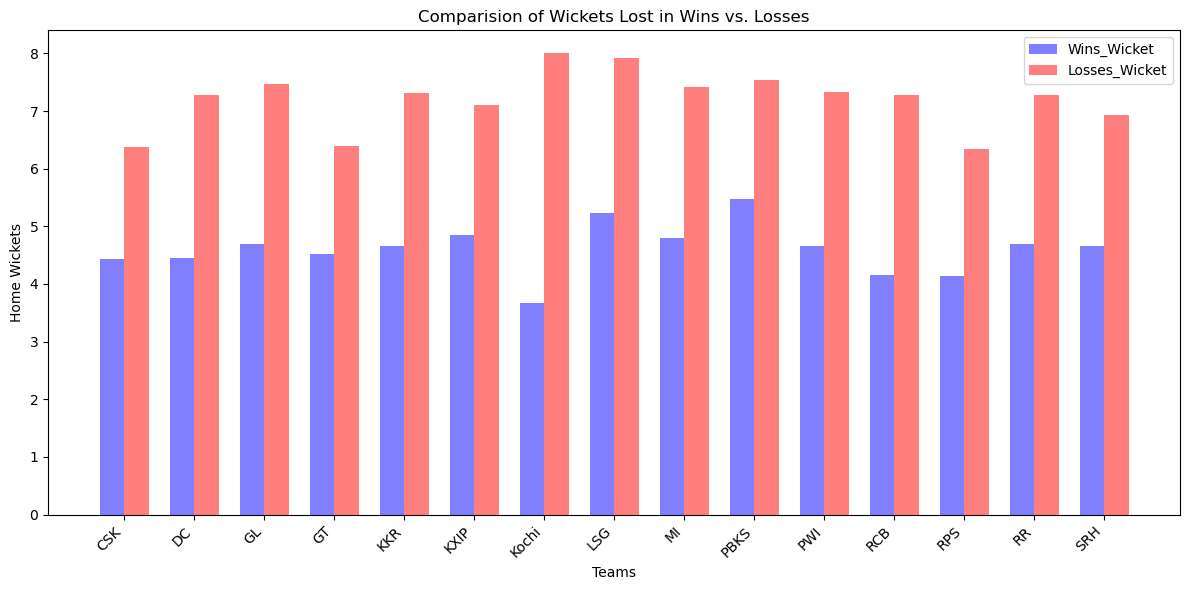

In [84]:
# Calculate the number of teams
num_teams = len(winner_wicket_average['winner'])

# Define the width of each bar
bar_width = 0.35

# Calculate bar positions
bar_positions1 = np.arange(num_teams)
bar_positions2 = bar_positions1 + bar_width
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data from the first table
ax.bar(bar_positions1, winner_wicket_average['winner_wickets'], width=bar_width, color='blue', alpha=0.5, label='Wins_Wicket')

# Plot data from the second table
ax.bar(bar_positions2, loser_wicket_average['loser_wickets'], width=bar_width, color='red', alpha=0.5, label='Losses_Wicket')

# Add labels and title
ax.set_ylabel('Home Wickets')
ax.set_xlabel('Teams')
ax.set_title('Comparision of Wickets Lost in Wins vs. Losses')
ax.set_xticks(bar_positions1 + bar_width / 2)

# Update x-axis tick labels with team names
tick_labels = winner_wicket_average['winner'].tolist()  # Convert team names to a list
ax.set_xticklabels(tick_labels)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Wicket Fall Patterns Against Specific Teams
Radar charts displaying wicket fall patterns against specific opposing teams.

In [85]:
pivot_table = pd.pivot_table(ipl_data, values=['home_wickets'], index=['home_team'], columns=['away_team'], aggfunc='sum', fill_value=0)

In [86]:
pivot_table

home_wickets                                                         \
away_team          CSK   DC  GL  GT KKR KXIP Kochi LSG   MI PBKS PWI  RCB RPS   
home_team                                                                       
CSK                  0  102   0  12  63   59     5   7  123   20  19   86   0   
DC                  69    0   8   8  99   76     6   7  118   13  15   91  15   
GL                   0   12   0   0   8   16     0   0   13    0   0   11   6   
GT                  16   12   0   0   4    0     0   7   14    8   0    4   0   
KKR                 77   77   9  15   0   75     9  15   94   16  12   76  10   
KXIP                51   66   9   0  92    0     0   0   92    0  14   52   8   
Kochi                3   10   0   0   5    7     0   0    0    0   0    5   0   
LSG                  4   10   0  17   7    0     0   0   19    8   0   24   0   
MI                 104   92  12   5  75   78     2   9    0   19  15   91  33   
PBKS                12   15   0  17  14    0     0  18    4    0   0   20   0   
PWI                 18   12   0   0  25   18     6   0   21    0   0   18   0   
RCB                 94   88  19   7  95   87     1   2   86   16  14    0  12   
RPS                  0   11   8   0  10    7     0   0    8    0   0   11   0   
RR                  76   70   0  19  70   47     2  12   65   14  13   88   0   
SRH                 80   88   6   2  99   88     0  15  108   17  18  112  17   

                    
away_team  RR  SRH  
home_team           
CSK        75   81  
DC         79   97  
GL          0   25  
GT         13   14  
KKR        80   93  
KXIP       74   74  
Kochi       2   10  
LSG         8    5  
MI         84   93  
PBKS       14   20  
PWI         9   26  
RCB        85  103  
RPS         0   12  
RR          0   54  
SRH        88    0

In [87]:

data = {
    'home_team': ['CSK', 'DC', 'GL', 'GT', 'KKR', 'KXIP', 'Kochi', 'LSG', 'MI', 'PBKS', 'PWI', 'RCB', 'RPS', 'RR', 'SRH'],
    'CSK': [0, 69, 0, 16, 77, 51, 3, 4, 104, 12, 18, 94, 0, 76, 80],
    'DC': [102, 0, 12, 12, 77, 66, 10, 10, 92, 15, 12, 88, 11, 70, 88],
    'GL': [0, 8, 0, 0, 9, 9, 0, 0, 12, 0, 0, 19, 8, 0, 6],
    'GT': [12, 8, 0, 0, 15, 0, 0, 17, 5, 17, 0, 7, 0, 19, 2],
    'KKR': [63, 99, 8, 4, 0, 92, 5, 7, 75, 14, 25, 95, 10, 70, 99],
    'KXIP': [59, 76, 16, 0, 75, 0, 7, 0, 78, 0, 18, 87, 7, 47, 88],
    'Kochi': [5, 6, 0, 0, 9, 0, 0, 0, 2, 0, 6, 1, 0, 2, 0],
    'LSG': [7, 7, 0, 7, 15, 0, 0, 0, 9, 18, 0, 2, 0, 12, 15],
    'MI': [123, 118, 13, 14, 94, 92, 0, 19, 0, 4, 21, 86, 8, 65, 108],
    'PBKS': [20, 13, 0, 8, 16, 0, 0, 8, 19, 0, 0, 16, 0, 14, 17],
    'PWI': [19, 15, 0, 0, 12, 14, 0, 0, 15, 0, 0, 14, 0, 13, 18],
    'RCB': [86, 91, 11, 4, 76, 52, 5, 24, 91, 20, 18, 0, 11, 88, 112],
    'RPS': [0, 15, 6, 0, 10, 8, 0, 0, 33, 0, 0, 12, 0, 0, 17],
    'RR': [75, 79, 0, 13, 80, 74, 2, 8, 84, 14, 9, 85, 0, 0, 88],
    'SRH': [81, 97, 25, 14, 93, 74, 10, 5, 93, 20, 26, 103, 12, 54, 0]
}

pivot_table = pd.DataFrame(data).set_index('home_team')
pivot_table


,CSK,DC,GL,GT,KKR,KXIP,Kochi,LSG,MI,PBKS,PWI,RCB,RPS,RR,SRH
home_team,,,,,,,,,,,,,,,
CSK,0,102,0,12,63,59,5,7,123,20,19,86,0,75,81
DC,69,0,8,8,99,76,6,7,118,13,15,91,15,79,97
GL,0,12,0,0,8,16,0,0,13,0,0,11,6,0,25
GT,16,12,0,0,4,0,0,7,14,8,0,4,0,13,14
KKR,77,77,9,15,0,75,9,15,94,16,12,76,10,80,93
KXIP,51,66,9,0,92,0,0,0,92,0,14,52,8,74,74
Kochi,3,10,0,0,5,7,0,0,0,0,0,5,0,2,10
LSG,4,10,0,17,7,0,0,0,19,8,0,24,0,8,5
MI,104,92,12,5,75,78,2,9,0,19,15,91,33,84,93


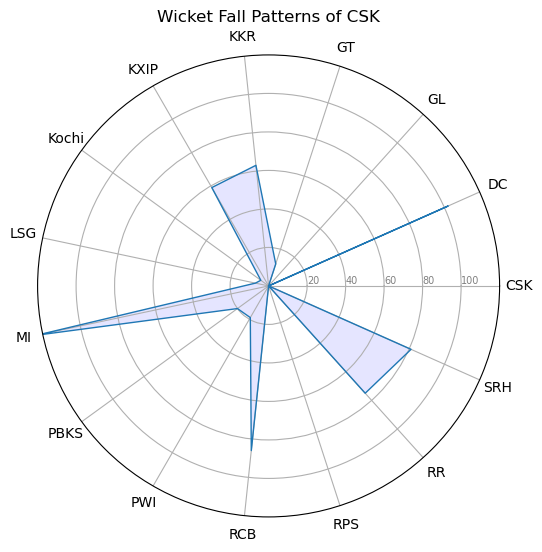

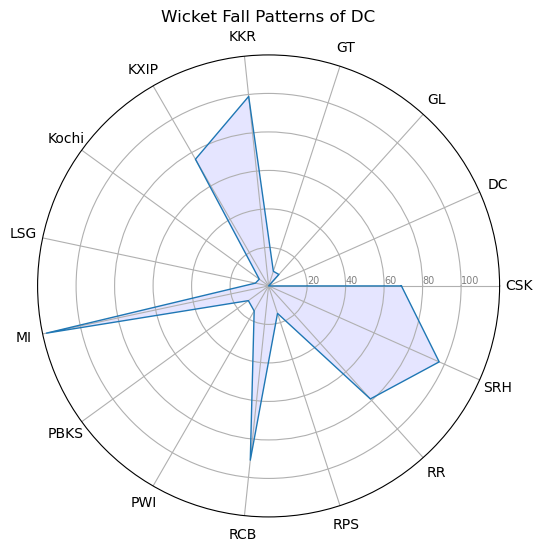

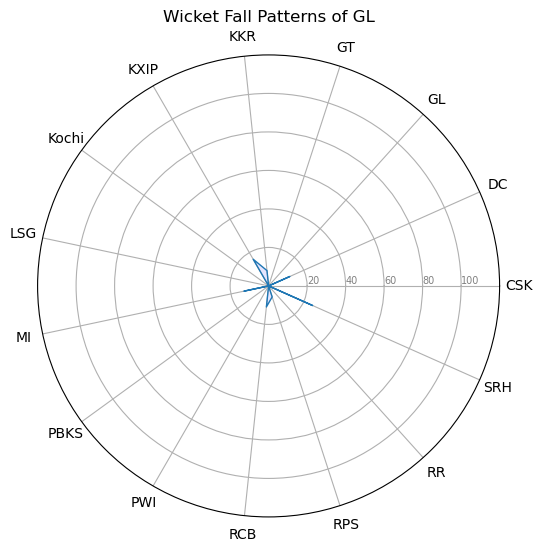

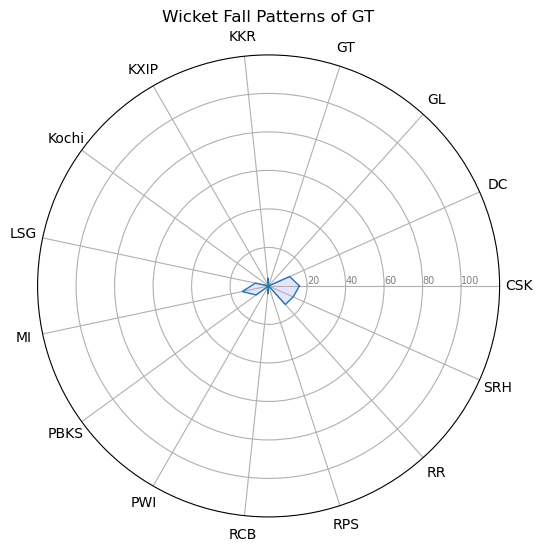

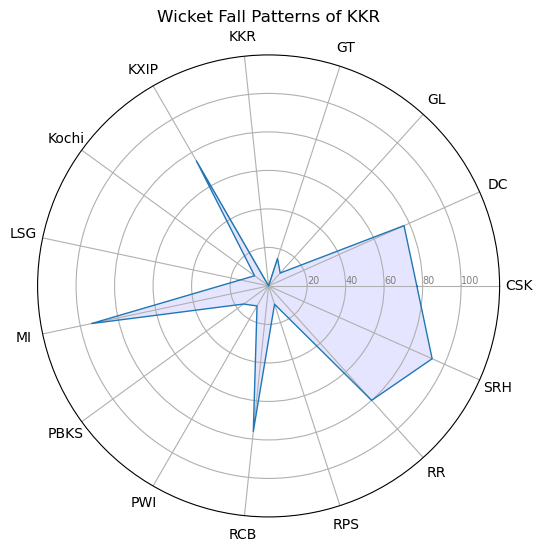

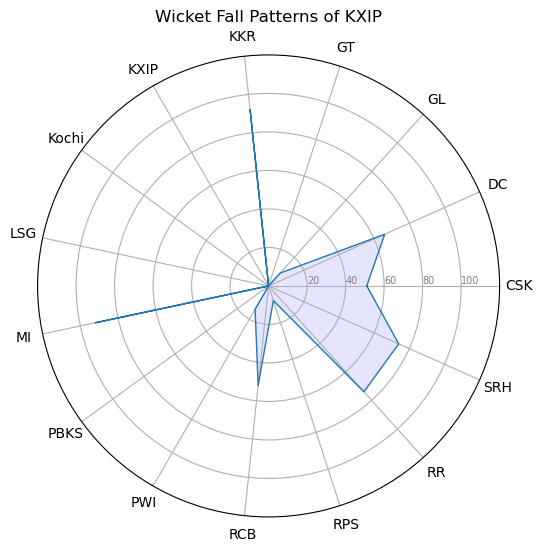

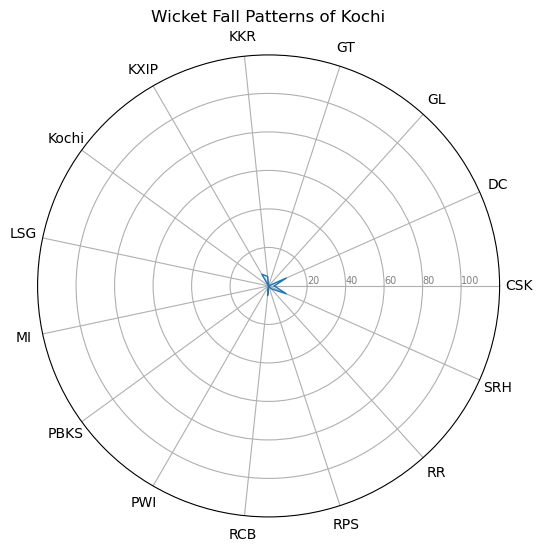

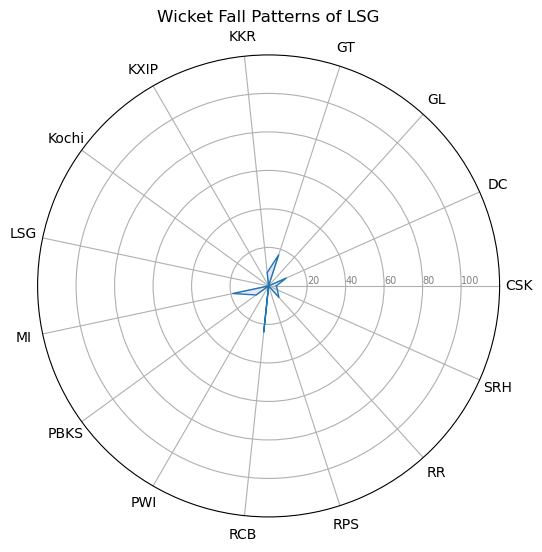

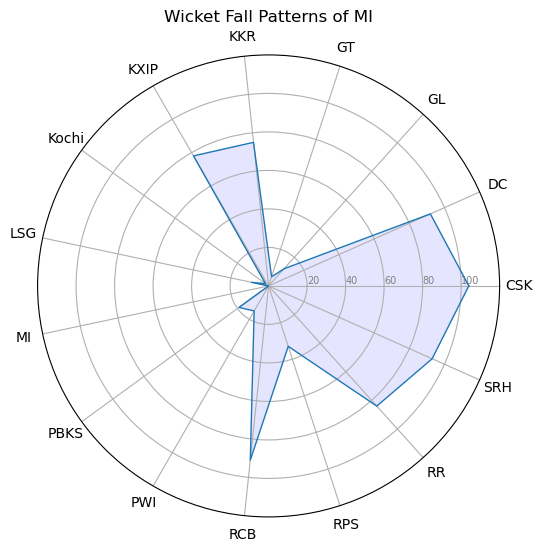

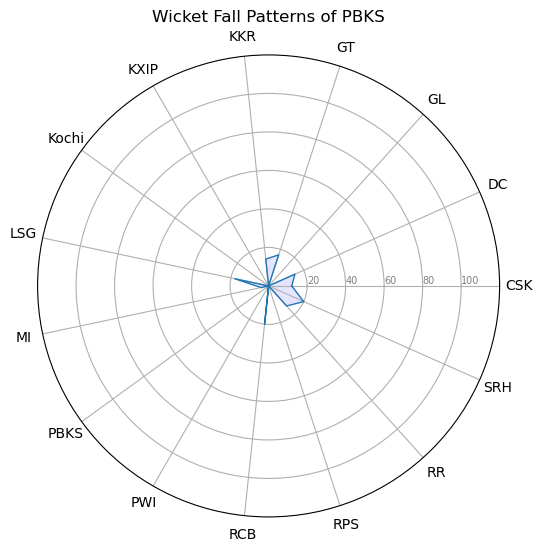

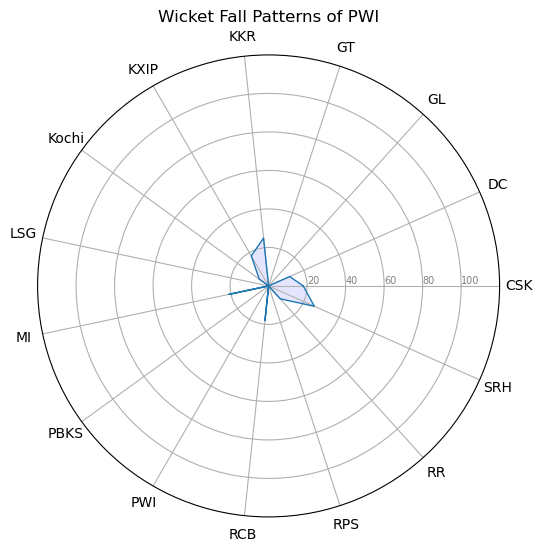

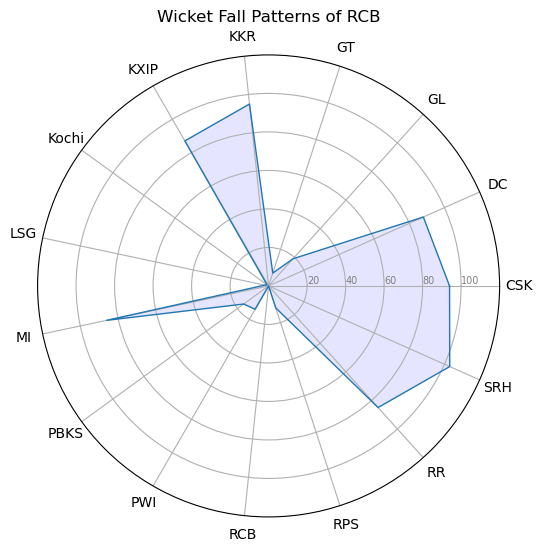

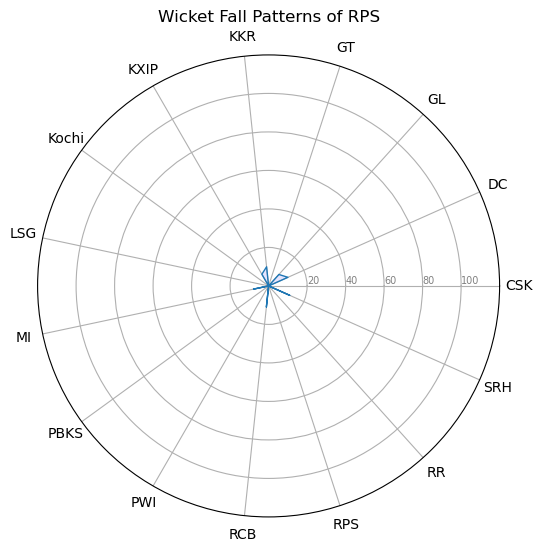

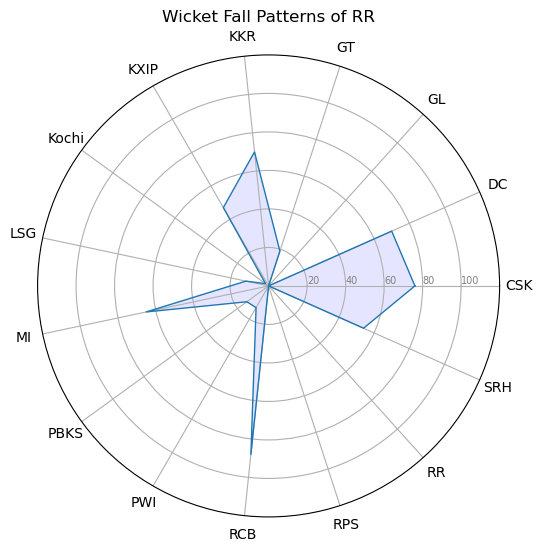

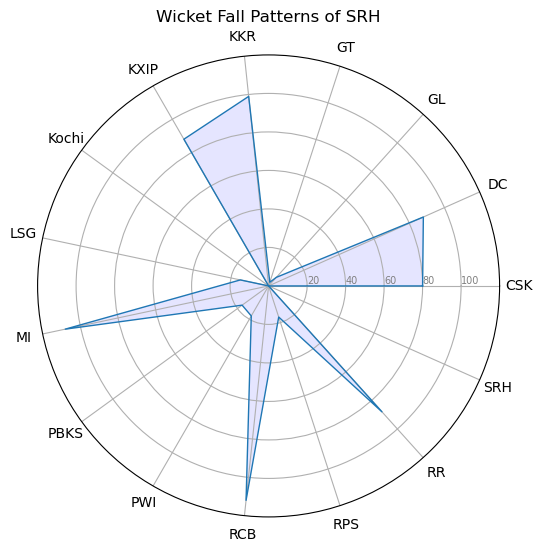

In [88]:
# Function to plot radar chart
def plot_radar_chart(df, home_team):
    categories = df.columns
    N = len(categories)
    
    values = df.loc[home_team].values.flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    plt.xticks(angles[:-1], categories)

    ax.set_rlabel_position(0)
    plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=7)
    plt.ylim(0, 120)

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(f'Wicket Fall Patterns of {home_team}')
    plt.show()

# Plot radar charts for all home teams
for home_team in pivot_table.index:
    plot_radar_chart(pivot_table, home_team)


# •	Wickets Lost in High-Scoring vs. Low-Scoring Matches
	Box plots comparing wickets lost in high-scoring (200+ runs) versus low-scoring matches.(average not mentioned )


In [89]:
ipl_data.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire', 'loser',
       'winner_wickets', 'loser_wickets'],
      dtype='object')

In [90]:
hom_team_score=ipl_data[['home_team','home_wickets','home_runs']]

### Home team high scoring 

In [91]:
high_scoring = hom_team_score[hom_team_score['home_runs'] > 200]

In [92]:
high_scoring.head(2)

,home_team,home_wickets,home_runs
5,CSK,7.0,217.0
8,KKR,7.0,204.0


### Home team Low scoring

In [93]:
low_scoring = hom_team_score[hom_team_score['home_runs'] < 200]

In [94]:
low_scoring.head(2)

,home_team,home_wickets,home_runs
0,GT,5.0,182.0
1,PBKS,5.0,191.0


In [95]:
# Group by home team and calculate the average of home wickets
average_wickets_by_high_scoring_team = high_scoring.groupby('home_team')['home_wickets'].mean().reset_index()

print(average_wickets_by_high_scoring_team)


   home_team  home_wickets
0        CSK      5.200000
1         DC      4.428571
2         GT      3.800000
3        KKR      6.142857
4       KXIP      4.000000
5        LSG      4.000000
6         MI      5.000000
7       PBKS      6.000000
8        RCB      4.266667
9         RR      5.125000
10       SRH      4.222222


In [96]:
# Group by home team and calculate the average of home wickets
average_wickets_by_Low_scoring_team = low_scoring.groupby('home_team')['home_wickets'].mean().reset_index()

print(average_wickets_by_Low_scoring_team)
#gl,kochi,pwi,rps

   home_team  home_wickets
0        CSK      5.349057
1         DC      5.826087
2         GL      6.066667
3         GT      5.615385
4        KKR      5.798077
5       KXIP      5.839080
6      Kochi      6.000000
7        LSG      7.000000
8         MI      6.160377
9       PBKS      6.823529
10       PWI      6.652174
11       RCB      6.009524
12       RPS      4.785714
13        RR      5.556818
14       SRH      6.194690


#### droping this teams because it is not avaialbe (gl,kochi,pwi,rps)

In [97]:
average_wickets_by_Low_scoring_team.drop(index=[2,6,10,12] ,inplace=True)

In [98]:
average_wickets_by_Low_scoring_team.reset_index(drop=True, inplace=True)

In [99]:
average_wickets_by_Low_scoring_team

,home_team,home_wickets
0,CSK,5.349057
1,DC,5.826087
2,GT,5.615385
3,KKR,5.798077
4,KXIP,5.839080
5,LSG,7.000000
6,MI,6.160377
7,PBKS,6.823529
8,RCB,6.009524
9,RR,5.556818


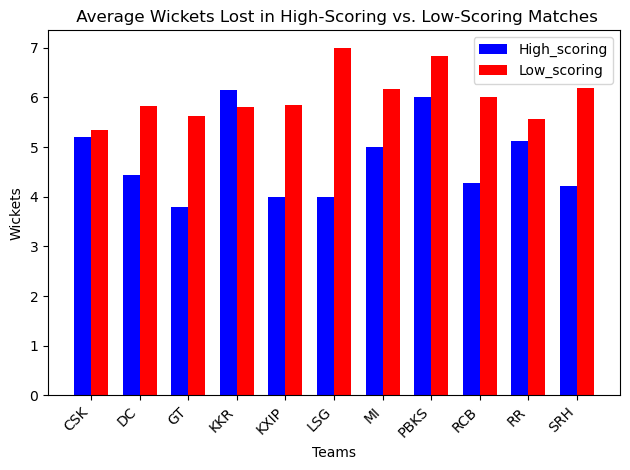

In [100]:

# Set the positions of the bars on the x-axis
bar_positions1 = np.arange(len(average_wickets_by_Low_scoring_team['home_team']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

# Create the bar chart
plt.bar(bar_positions1, average_wickets_by_high_scoring_team['home_wickets'], color='blue', width=bar_width, label='High_scoring')
plt.bar(bar_positions2, average_wickets_by_Low_scoring_team['home_wickets'], color='red', width=bar_width, label='Low_scoring')

# Add labels and title
plt.xlabel('Teams')
plt.ylabel('Wickets')
plt.title(' Average Wickets Lost in High-Scoring vs. Low-Scoring Matches')
plt.xticks(bar_positions1 + bar_width / 2, average_wickets_by_high_scoring_team['home_team'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Wicket Falls in Clutch Situations
	Line graphs illustrating the timing of crucial wickets falling in high-pressure situations (e.g., final overs).


In [101]:
bat.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'current_innings', 'innings_id', 'name', 'fullName',
       'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate',
       'captain', 'isNotOut', 'runningScore', 'runningOver', 'shortText',
       'commentary', 'link'],
      dtype='object')

In [102]:
Clutch = bat[(bat['runningOver'] >= 16) & (bat['runningOver'] <= 20)]

In [103]:
Clutch_data=Clutch[Clutch['isNotOut']== False]
Clutch_data

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
1,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,4.0,9.0,184.00,False,False,"{'wickets': 5, 'runs': 151}",17.1,c Shubman Gill b Joseph,"Joseph misses the yorker, but is still a hard-...",NaN
5,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0.0,1.0,105.55,False,False,"{'wickets': 7, 'runs': 163}",18.3,c Rashid Khan b Mohammed Shami,<strong>throat-high short ball angling across ...,NaN
6,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0.0,0.0,50.00,False,False,"{'wickets': 6, 'runs': 153}",17.4,c Shankar b Joseph,"Joseph goes for the yorker, marginally misses ...",NaN
13,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,GT,2,...,2.0,1.0,128.57,False,False,"{'wickets': 5, 'runs': 156}",17.6,c Santner b Hangargekar,big wicket. Looks like a slower ball. Shankar ...,NaN
20,2023.0,1359476,PBKS v KKR,PBKS,KKR,"Punjab Cricket Association IS Bindra Stadium, ...",Chandigarh,India,PBKS,1,...,1.0,1.0,123.07,False,False,"{'wickets': 5, 'runs': 168}",17.5,c Rana b Narine,<B>simple for Rana</b> running square from poi...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15706,2008.0,336040,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",Mumbai,India,CSK,1,...,1.0,2.0,143.33,False,False,"{'wickets': 4, 'runs': 128}",16.2,c Jadeja b Watson,caught! Big wicket that! Watson gave Raina the...,NaN
15709,2008.0,336040,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",Mumbai,India,CSK,1,...,0.0,0.0,66.66,False,False,"{'wickets': 5, 'runs': 148}",19.1,c Asnodkar b Sohail Tanvir,caught! Tanvir bowls the slower delivery angli...,NaN
15715,2008.0,336040,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",Mumbai,India,RR,2,...,3.0,4.0,143.58,False,False,"{'wickets': 7, 'runs': 143}",17.4,run out (Raina),Raina you beauty! A direct hit runs out Yusuf!...,NaN
15716,2008.0,336040,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",Mumbai,India,RR,2,...,0.0,1.0,133.33,False,False,"{'wickets': 5, 'runs': 139}",16.6,c Dhoni b Muralitharan,caught! Another twist! Kaif steps out of his c...,NaN


In [104]:
# Filter data for powerplay overs (1-6)
clutch = bat[(bat['runningOver'] >= 16) & (bat['runningOver'] <= 20)]

# Identify wicket events (isNotOut is False)
clutch_wickets = clutch[clutch['isNotOut'] == False]

# Count wickets by team
wickets_by_team1 = clutch_wickets.groupby('runningOver').size().reset_index(name='wickets')

In [105]:
wickets_by_team1

,runningOver,wickets
0,16.1,127
1,16.2,127
2,16.3,128
3,16.4,119
4,16.5,122
5,16.6,106
6,17.0,1
7,17.1,152
8,17.2,170
9,17.3,157


In [106]:
#droping the 17th and 19th  over from

In [107]:
wickets_by_team1.drop(index=[6,19] ,inplace=True)

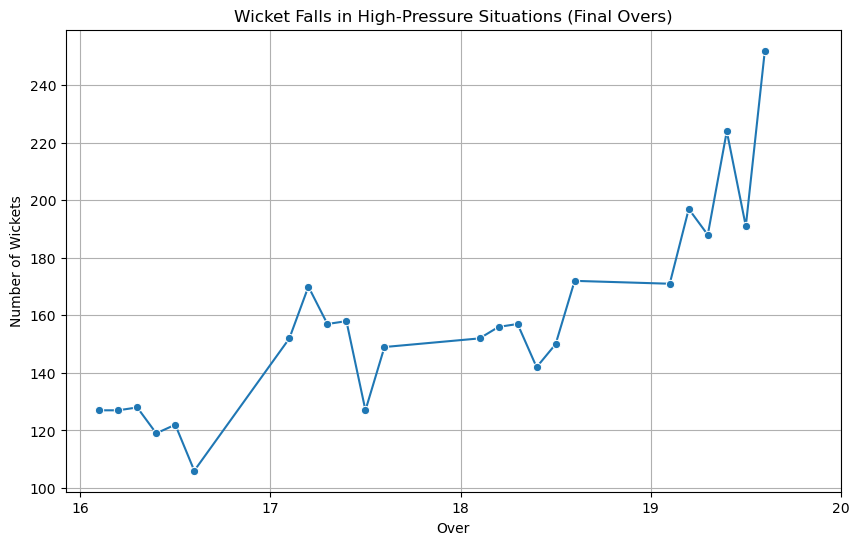

In [108]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=wickets_by_team1, x='runningOver', y='wickets', marker='o')
plt.title('Wicket Falls in High-Pressure Situations (Final Overs)')
plt.xlabel('Over')
plt.ylabel('Number of Wickets')
plt.xticks([16, 17, 18, 19, 20])
plt.grid(True)
plt.show()

# •	Wickets Lost Due to Different Types of Dismissals
	Doughnut charts showing the distribution of different types of dismissals (bowled, caught, LBW, etc.).


In [109]:
all_season_details=pd.read_csv(r"C:\Users\shita\Downloads\IPL_all_season_data\all_season_details.csv")

C:\Users\shita\AppData\Local\Temp\ipykernel_21836\2881118080.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  all_season_details=pd.read_csv(r"C:\Users\shita\Downloads\IPL_all_season_data\all_season_details.csv")


In [110]:
all_season_details.isnull().sum()

comment_id                0
season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts          12841
wicket_id           

In [111]:
data=all_season_details.dropna()

In [112]:
data['wkt_text'].value_counts()

wkt_text
AR Patel c sub (PN Mankad) b Wood 16 (21m 11b 1x4 1x6) SR: 145.45          1
MA Agarwal c Sangakkara b Perera 29 (22m 20b 3x4 2x6) SR: 145.00           1
DR Smith lbw b Morkel 18 (32m 24b 2x4 1x6) SR: 75.00                       1
DA Warner c Gurkeerat Singh b Hendricks 81 (80m 52b 6x4 5x6) SR: 155.76    1
KA Pollard run out (Bravo) 1 (5m 4b 0x4 0x6) SR: 25.00                     1
                                                                          ..
Rashid Khan hit wicket b Thakur 14 (8b 1x4 1x6) SR: 175.00                 1
EJG Morgan c Udana b Washington Sundar 8 (12b 1x4 0x6) SR: 66.66           1
R Tewatia  b Rabada 38 (29b 3x4 2x6) SR: 131.03                            1
SPD Smith c Hetmyer b Nortje 24 (17b 2x4 1x6) SR: 141.17                   1
CK Kapugedera c Asnodkar b Sohail Tanvir 8 (12b 0x4 0x6) SR: 66.66         1
Name: count, Length: 354, dtype: int64

C:\Users\shita\AppData\Local\Temp\ipykernel_21836\738558754.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dismissal_type'] = data['wkt_text'].apply(extract_dismissal)


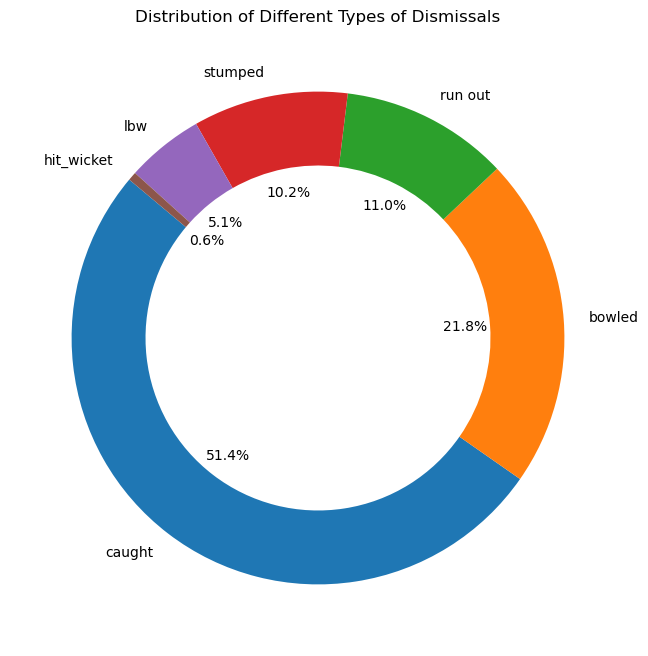

In [113]:
# Function to extract dismissal type
def extract_dismissal(text):
    if 'hit wicket' in text :
        return 'hit_wicket'
    elif 'run out' in text:
        return 'run out'
    elif 'c &dagger' in text:
        return 'stumped'
    elif 'lbw' in text:
        return 'lbw'
    elif ' c ' in text:
        return 'caught'
    else:
        return "bowled"

# Apply the function to create a new column for dismissal types
data['dismissal_type'] = data['wkt_text'].apply(extract_dismissal)

# Count the frequency of each dismissal type
dismissal_counts = data['dismissal_type'].value_counts()

# Create the doughnut chart
plt.figure(figsize=(8, 8))
plt.pie(dismissal_counts, labels=dismissal_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of Different Types of Dismissals')
plt.show()

# •	Impact of Toss on Wicket Falls
	Split bar charts to compare the fall of wickets based on whether the team batted first or second.


In [114]:
ipl_data.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire', 'loser',
       'winner_wickets', 'loser_wickets'],
      dtype='object')

In [115]:
#calculate toss_loser
ipl_data['toss_loss'] = ipl_data.apply(lambda row: row['away_team'] if row['toss_won'] == row['home_team'] else row['home_team'], axis=1)

In [118]:

# Calculate toss_winner_wickets and toss_loser_wickets
ipl_data['toss_winner_wickets'] = ipl_data.apply(lambda row: row['home_wickets'] if row['toss_won'] == row['home_team'] else row['away_wickets'], axis=1)
ipl_data['toss_loser_wickets'] = ipl_data.apply(lambda row: row['away_wickets'] if row['toss_won'] == row['home_team'] else row['home_wickets'], axis=1)

# Display the DataFrame with new columns
print(ipl_data[['toss_won', 'toss_loss', 'toss_winner_wickets', 'toss_loser_wickets','winner','loser']].head())

  toss_won toss_loss  toss_winner_wickets  toss_loser_wickets winner loser
0       GT       CSK                  5.0                 7.0     GT   CSK
1      KKR      PBKS                  7.0                 5.0   PBKS   KKR
2       DC       LSG                  9.0                 6.0    LSG    DC
3      SRH        RR                  8.0                 5.0     RR   SRH
4      RCB        MI                  2.0                 7.0    RCB    MI


In [119]:

#create toss loss decision column
ipl_data['Toss_Loser_Decision'] = ipl_data.apply(lambda row: 'BAT FIRST' if row['decision'] == 'BOWL FIRST' else 'BOWL FIRST', axis=1)

In [121]:
data6=ipl_data[['toss_won', 'toss_loss', 'toss_winner_wickets', 'toss_loser_wickets','decision','Toss_Loser_Decision']]

In [122]:
data6.head(2)

,toss_won,toss_loss,toss_winner_wickets,toss_loser_wickets,decision,Toss_Loser_Decision
0,GT,CSK,5.0,7.0,BOWL FIRST,BAT FIRST
1,KKR,PBKS,7.0,5.0,BOWL FIRST,BAT FIRST


In [123]:
winner_wicket_average=data6.groupby(['decision'])["toss_winner_wickets"].mean().reset_index()
winner_wicket_average

,decision,toss_winner_wickets
0,BAT FIRST,5.841398
1,BOWL FIRST,5.731481
2,no toss,NaN


In [124]:
winner_wicket_average.drop(index=2,inplace=True)

In [125]:
loser_wicket_average=data6.groupby(['Toss_Loser_Decision'])["toss_loser_wickets"].mean().reset_index()
loser_wicket_average

,Toss_Loser_Decision,toss_loser_wickets
0,BAT FIRST,6.212635
1,BOWL FIRST,5.582210


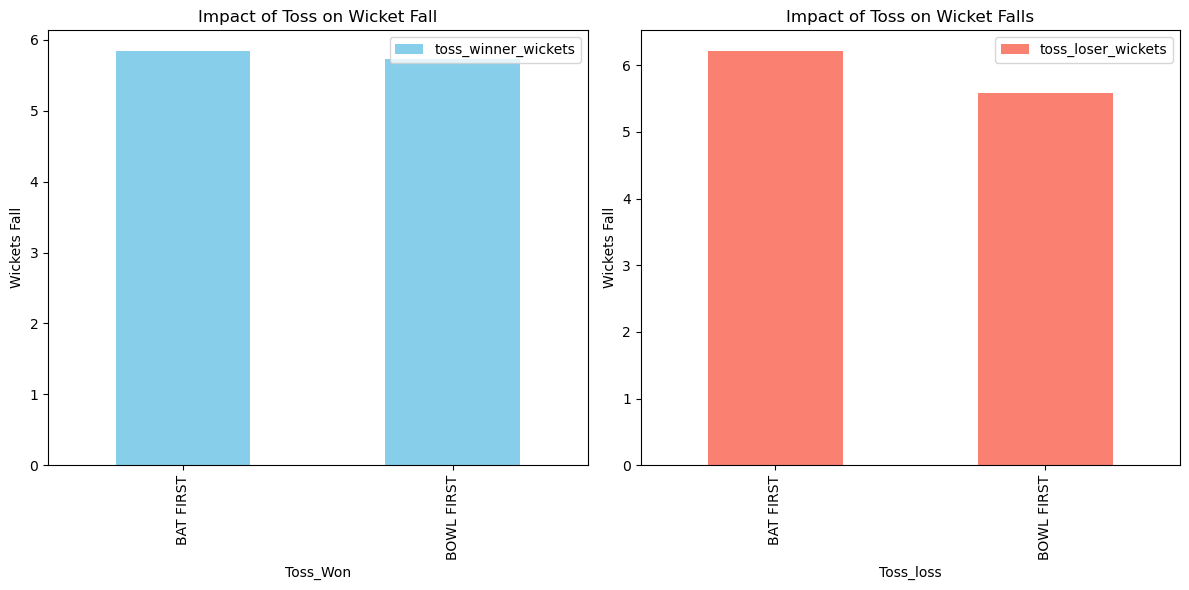

In [126]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Toss Winner
winner_wicket_average.plot(kind='bar', x='decision', y='toss_winner_wickets', ax=axes[0], color='skyblue')
axes[0].set_title('Impact of Toss on Wicket Fall')
axes[0].set_xlabel('Toss_Won')
axes[0].set_ylabel('Wickets Fall')

# Plot for Toss Loser
loser_wicket_average.plot(kind='bar', x='Toss_Loser_Decision', y='toss_loser_wickets', ax=axes[1], color='salmon')
axes[1].set_title('Impact of Toss on Wicket Falls')
axes[1].set_xlabel('Toss_loss')
axes[1].set_ylabel('Wickets Fall')

plt.tight_layout()
plt.show()

Teams that win the toss and choose to bat first tend to lose slightly more wickets on average compared to when they choose to bowl first.
Teams that lose the toss and end up batting first lose more wickets on average compared to when they bowl first

In [130]:
# Function to extract dismissal type
def extract_batting_order(text):
    if 'opener' in text :
        return 'opener'
    elif ' middle-order ' in text:
        return 'middle-order'
    elif 'lower-order' in text:
        return 'lower-order'
    else:
        return "others"

# Apply the function to create a new column for dismissal types
data_req['batting_order'] = data_req['highlights'].apply(extract_batting_order)

C:\Users\shita\AppData\Local\Temp\ipykernel_21836\2414420230.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_req['batting_order'] = data_req['highlights'].apply(extract_batting_order)


In [131]:
data_req['batting_order'].unique()

array(['opener', 'others'], dtype=object)